In [1]:
#loading data
from sklearn.datasets import load_iris
import numpy as np
data = load_iris().data
labels = load_iris().target
#reshape labels since data is a 2d array
labels = np.reshape(labels,(150,1))
data = np.concatenate([data,labels],axis=-1)

In [3]:
#create pandas df
import pandas as pd
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.DataFrame(data,columns=names)
#add a good name for the targer
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

In [6]:
dataset.describe()
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


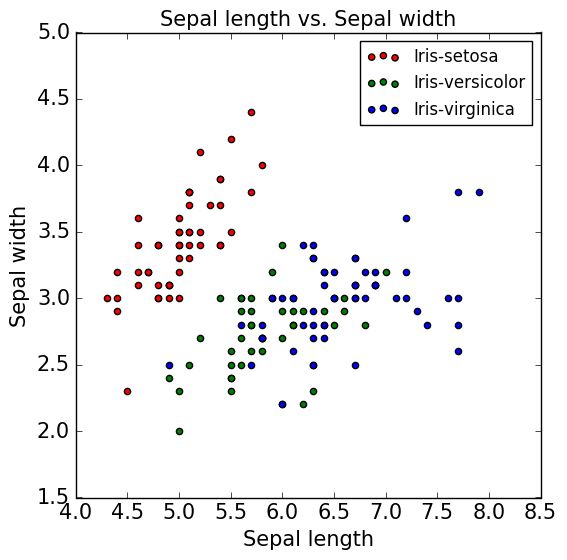

In [47]:
#plot the first two feature for the dataset
import matplotlib.pyplot as plt
plt.figure(4, figsize=(6, 6))
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']=='Iris-setosa')],np.asarray(dataset['sepal-width'])[np.where(dataset['species']=='Iris-setosa')], c='r', label='Iris-setosa')
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']=='Iris-versicolor')],np.asarray(dataset['sepal-width'])[np.where(dataset['species']=='Iris-versicolor')], c='g', label='Iris-versicolor')
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']=='Iris-virginica')],np.asarray(dataset['sepal-width'])[np.where(dataset['species']=='Iris-virginica')], c='b', label='Iris-virginica')
plt.xlabel('Sepal length',fontsize=15)
plt.ylabel('Sepal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Sepal length vs. Sepal width',fontsize=15)
plt.legend(prop={'size': 12})
plt.show()
plt.show()

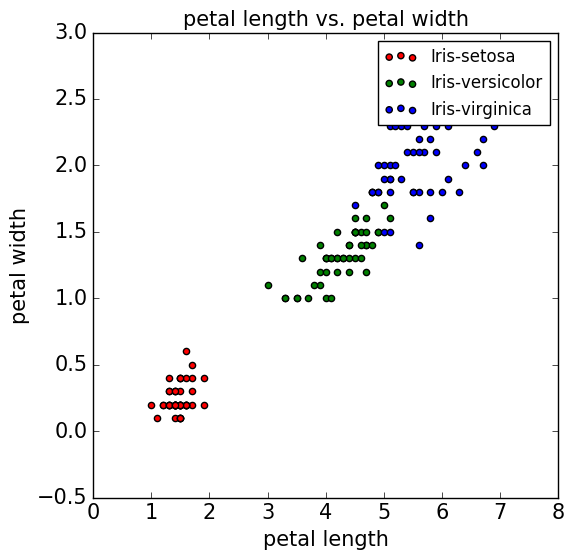

In [48]:
import matplotlib.pyplot as plt
plt.figure(4, figsize=(6, 6))
plt.scatter(np.asarray(dataset['petal-length'])[np.where(dataset['species']=='Iris-setosa')],np.asarray(dataset['petal-width'])[np.where(dataset['species']=='Iris-setosa')], c='r', label='Iris-setosa')
plt.scatter(np.asarray(dataset['petal-length'])[np.where(dataset['species']=='Iris-versicolor')],np.asarray(dataset['petal-width'])[np.where(dataset['species']=='Iris-versicolor')], c='g', label='Iris-versicolor')
plt.scatter(np.asarray(dataset['petal-length'])[np.where(dataset['species']=='Iris-virginica')],np.asarray(dataset['petal-width'])[np.where(dataset['species']=='Iris-virginica')], c='b', label='Iris-virginica')
plt.xlabel('petal length',fontsize=15)
plt.ylabel('petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('petal length vs. petal width',fontsize=15)
plt.legend(prop={'size': 12})
plt.show()
plt.show()


In [59]:
#correlation matrix between two variables
#iloc accesses a position just with one index
dataset.iloc[:,:].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [83]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3],dataset['species'], test_size=0.2, random_state=42)
train_data.shape,train_label.shape,test_data.shape,test_label.shape


((120, 3), (120,), (30, 3), (30,))

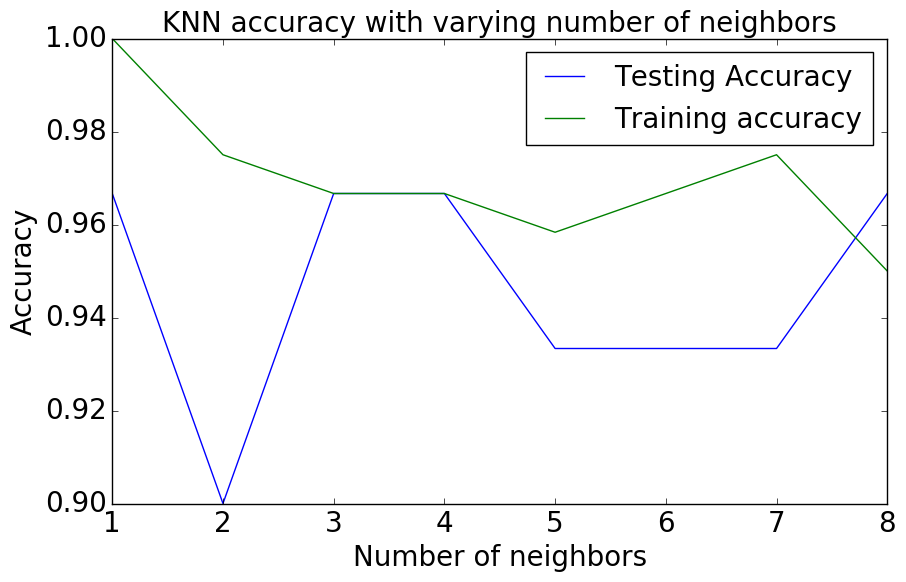

In [85]:
#k-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier


#choose the correct number of neighbors with cross valiedation
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)
#pick best k-value
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [86]:
#train for 3-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

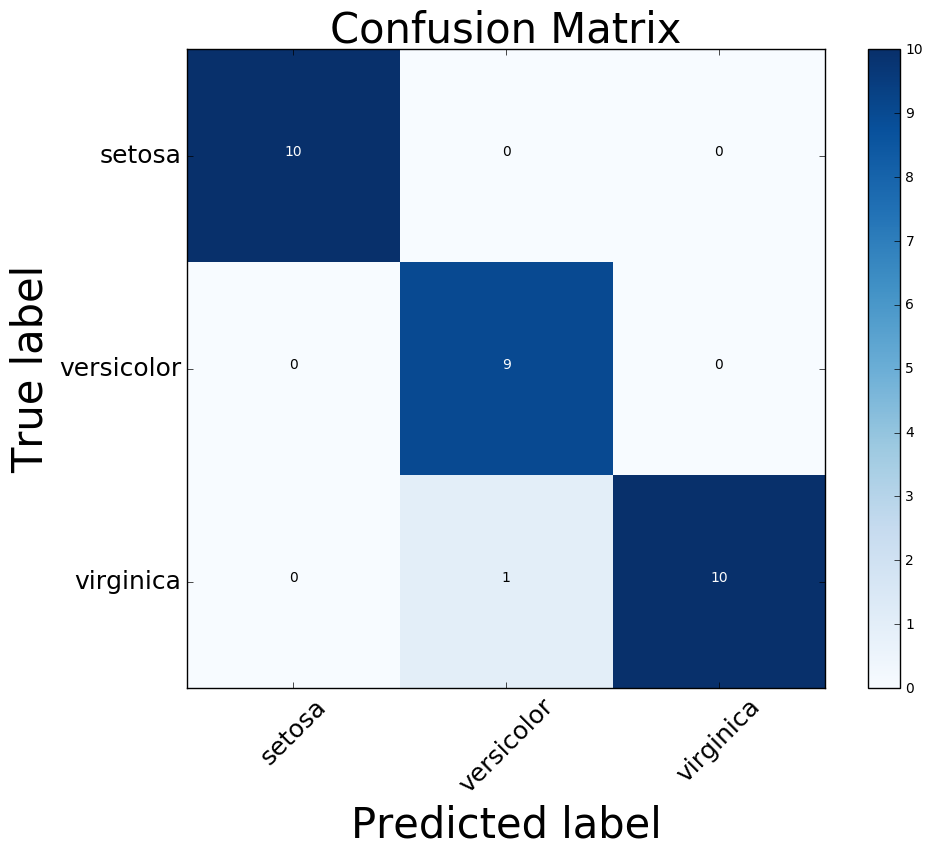

In [90]:
#plot confusion matrix
prediction = knn.predict(test_data)

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [91]:
from sklearn.metrics import classification_report
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

    avg / total       0.97      0.97      0.97        30



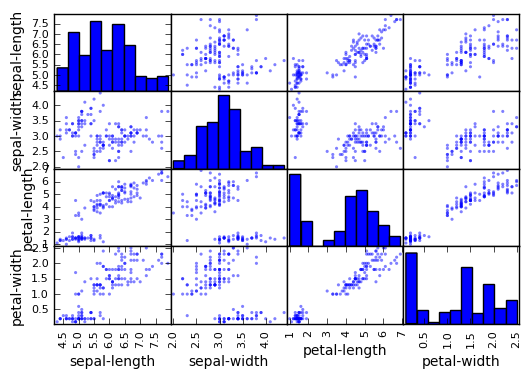

In [101]:
#plot scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


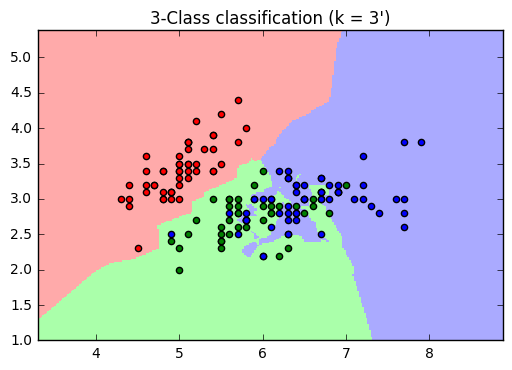

In [233]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
dataset['species'].replace('Iris-setosa',0,inplace=True)
dataset['species'].replace('Iris-versicolor',1,inplace=True)
dataset['species'].replace('Iris-virginica',2,inplace=True)

X = np.asarray(dataset.iloc[:, :2])
y = np.asarray(dataset.iloc[:, -1:])

n_neighbors=3

knn2 = KNeighborsClassifier(n_neighbors=n_neighbors)

knn2.fit(X,y)

h = .02  # step size in the mesh


# Create color maps
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min=X[:,0].min()-1
x_max=X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']==0)],np.asarray(dataset['sepal-width'])[np.where(dataset['species']==0)], c='r', label='Iris-setosa')
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']==1)],np.asarray(dataset['sepal-width'])[np.where(dataset['species']==1)], c='g', label='Iris-versicolor')
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']==2)],np.asarray(dataset['sepal-width'])[np.where(dataset['species']==2)], c='b', label='Iris-virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i')" % (n_neighbors))

plt.show()


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


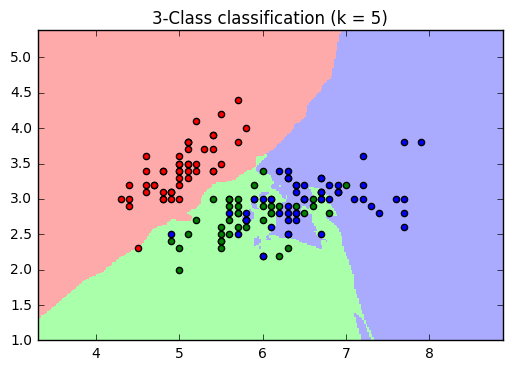

In [236]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
dataset['species'].replace('Iris-setosa',0,inplace=True)
dataset['species'].replace('Iris-versicolor',1,inplace=True)
dataset['species'].replace('Iris-virginica',2,inplace=True)

X = np.asarray(dataset.iloc[:, :2])
y = np.asarray(dataset.iloc[:, -1:])

n_neighbors=5

knn2 = KNeighborsClassifier(n_neighbors=n_neighbors)

knn2.fit(X,y)

h = .02  # step size in the mesh


# Create color maps
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min=X[:,0].min()-1
x_max=X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']==0)],np.asarray(dataset['sepal-width'])[np.where(dataset['species']==0)], c='r', label='Iris-setosa')
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']==1)],np.asarray(dataset['sepal-width'])[np.where(dataset['species']==1)], c='g', label='Iris-versicolor')
plt.scatter(np.asarray(dataset['sepal-length'])[np.where(dataset['species']==2)],np.asarray(dataset['sepal-width'])[np.where(dataset['species']==2)], c='b', label='Iris-virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()


In [192]:
dataset['species']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [224]:
dataset.iloc[:, :2]

,sepal-length,sepal-width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1
